In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Take away: 
- CDF is integral of PDF

Decreasing the number of bins (bins) will reduce the PDF/CDF resolution
Decreasing the number of samples (N) per segment will also reduse the resolution


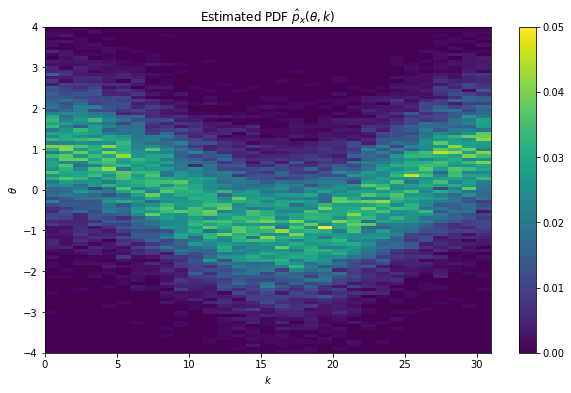

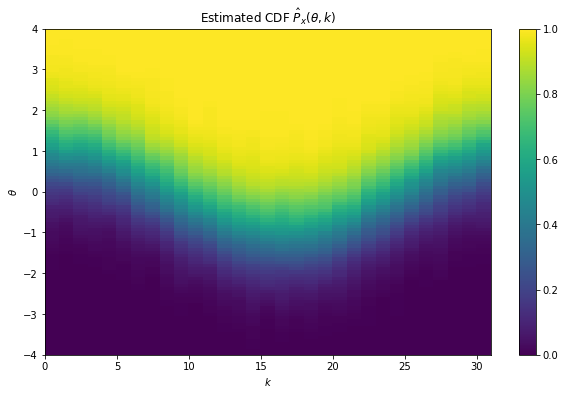

In [179]:
## PDF & CDF
## Show the relationship between PDF and CDF
k  = 32    # segments
N  = 1000  # Samples pts per segment
bins = 100 # bins
fq = 1     # freq (hz)

# Generate a series of signals with Gaussian noise
np.random.seed(2)
x = np.random.normal(size = (N,k)) # Gaussian noise [1000 x 32]
y = np.cos(2*np.pi*fq/k*np.arange(k)) # Signal(freq) [1000 + 1]

# construct signals
x += np.tile(y, [N, 1])            # Signal()freq + Guassian noise

# compute the histogram for each segment
px = np.zeros((bins, k))
for n in range(k):
    px[:, n], edges = np.histogram(x[:, n], bins=bins, range=(-4,4), density=True)
    px[:, n] /= np.sum(px[:, n]) # normalized (pdf must sum to 1)
    
# compute the CDF           
Px = np.cumsum(px, axis=0) # normalized (cdf last value must equal 1)

# plot the PDF
plt.figure(figsize=(10,6))
plt.pcolor(np.arange(k), edges, px)
plt.title(r'Estimated PDF $\hat{p}_x(\theta, k)$')
plt.xlabel(r'$k$')
plt.ylabel(r'$\theta$')
plt.colorbar()
plt.autoscale(tight=True)

# plot the CDF
plt.figure(figsize=(10,6))
plt.pcolor(np.arange(k), edges, Px, vmin=0, vmax=1)
plt.title(r'Estimated CDF $\hat{P}_x(\theta, k)$')
plt.xlabel(r'$k$')
plt.ylabel(r'$\theta$')
plt.colorbar()
plt.autoscale(tight=True)
print("Take away: \n- CDF is integral of PDF")
print("\nDecreasing the number of bins (bins) will reduce the PDF/CDF resolution")
print("Decreasing the number of samples (N) per segment will also reduse the resolution")

In [90]:
## Ensemble mapping E[f(x[k])] = 1/n sum(f(x|n[k]))
print("\tFirst order Ensemble: only consider one signal, x[k]")
print("Ensemble averages characterize the average properties of a random process across the population of all possible\nsample functions in the ensemble.")
print("\tE[f(x[k])] = 1/n sum(f(x|n[k]))")
# The choice of the mapping function f(n) determines the particular property 
#  of the random process which is characterized by the ensemble average. 
print("\nCommon mapping functions: f(x[k])")
print("1.  Linear --> \t\tf(x[k])=x[k]")
print("2.  Quadratic mean --> \tf(x[k])=x[k]^2")
print("3.  Variance --> \tf(x[k])=(x[k]-u[k])^2   or   E[x[k]^2] - u[k]^2")

	First order Ensemble: only consider one signal, x[k]
Ensemble averages characterize the average properties of a random process across the population of all possible
sample functions in the ensemble.
	E[f(x[k])] = 1/n sum(f(x|n[k]))

Common mapping functions: f(x[k])
1.  Linear --> 		f(x[k])=x[k]
2.  Quadratic mean --> 	f(x[k])=x[k]^2
3.  Variance --> 	f(x[k])=(x[k]-u[k])^2   or   E[x[k]^2] - u[k]^2


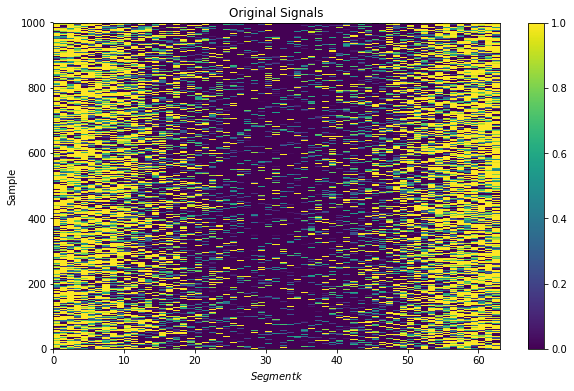

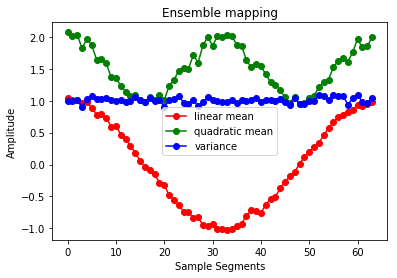

In [87]:
K = 64  # number of random samples
N = 1000  # number of sample functions


# generate the sample functions
np.random.seed(5)
x = np.random.normal(size=(N, K))
x += np.tile(np.cos(2*np.pi/K*np.arange(K)), [N, 1])

# estimate the linear mean as ensemble average
mu = 1/N * np.sum(x, 0)
# estimate the quadratic mean
qu = 1/N * np.sum(x**2, 0)
# estimate the variance
sigma = 1/N * np.sum((x-mu)**2, 0)


# visualize signal mixed with Gaussian noise
plt.figure(figsize=(10,6))
plt.pcolor(np.arange(K), np.arange(N), x, vmin=0, vmax=1)
plt.title(r'Original Signals')
plt.xlabel(r'$Segment k$')
plt.ylabel(r'Sample')
plt.colorbar()
plt.show()
# plot Ensemble mapping results
plt.plot(mu,'r-o')
plt.plot(qu,'g-o')
plt.plot(sigma,'b-o')
plt.legend(['linear mean','quadratic mean','variance'])
plt.title('Ensemble mapping')
plt.ylabel('Amplitude')
plt.xlabel('Sample Segments')
plt.show()

In [107]:
## Higher order Ensemble mapping E[f(x[k])] = 1/n sum(f(x|n[k]))
print("Higher (2nd) order Ensemble: Now consider 2 signals, x[k] & y[k]")
print("\tE[f(x[kx],y[ky])] = 1/n sum(f(x|n[kx],y|n[ky]))")
print("\n*Note* that signals x & y can be compared at 2 separate time points: kx & ky")
# The choice of the mapping function f(n) determines the particular property 
#  of the random process which is characterized by the ensemble average. 
print("\nTwo New mapping functions for: f(x[kx],y[ky])")
print("1.  Cross-Correlation --> \tf(x[k],y[ky])=x[kx],y[ky]")
print("2.  Auto-Correlation --> \tf(x[k],x[k])=x[k1],x[k2]")

Higher (2nd) order Ensemble: Now consider 2 signals, x[k] & y[k]
	E[f(x[kx],y[ky])] = 1/n sum(f(x|n[kx],y|n[ky]))

*Note* that signals x & y can be compared at 2 separate time points: kx & ky

Two New mapping functions for: f(x[kx],y[ky])
1.  Cross-Correlation --> 	f(x[k],y[ky])=x[kx],y[ky]
2.  Auto-Correlation --> 	f(x[k],x[k])=x[k1],x[k2]


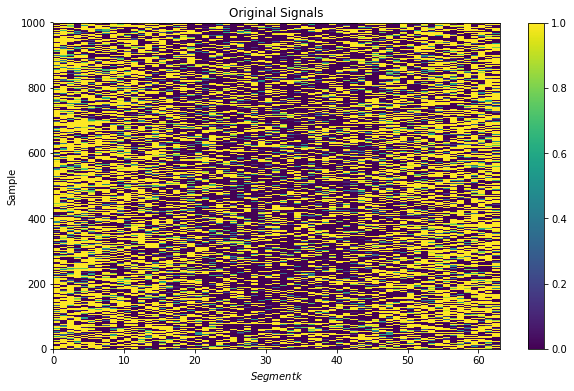

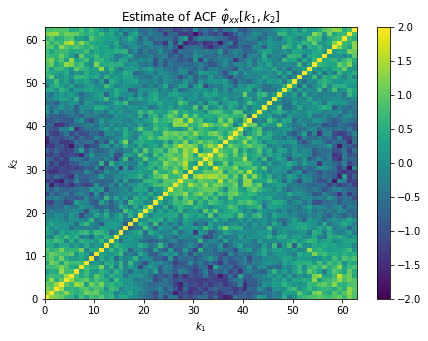

In [150]:
# Raw version of auto correlation
def auto_corr(x):
    n = x.shape[0]
    l = x.shape[1]
    corr_mat = np.zeros((l,l))
    for ln1 in range(l):
        for ln2 in range(l):
            corr_mat[ln1,ln2] = 1/n * (np.sum(x[:,ln1]*x[:,ln2]))
    return corr_mat

L = 64  # number of random samples
N = 1000  # number of sample functions

# generate sample functions
np.random.seed(1)
r = np.random.normal(size=(N, L))
h = np.random.normal(size=(N, 10))
x = np.zeros((N,L))
for n in range(N):
    x[n,:] = np.convolve(r[n,:], h[n,:], mode='same') # convolve random noise r with random noise h
x += np.tile(np.cos(2*np.pi/L*np.arange(L)), [N,1])   # signal = signal clean + r + h

corr_mat = auto_corr(x)

# Visualize
plt.figure(figsize=(10,6))
plt.pcolor(np.arange(L), np.arange(N), x, vmin=0, vmax=1)
plt.title(r'Original Signals')
plt.xlabel(r'$Segment k$')
plt.ylabel(r'Sample')
plt.colorbar()
#
plt.figure(figsize = (7, 5))
plt.pcolor(np.arange(L), np.arange(L), corr_mat, vmin=-2, vmax=2)
plt.title(r'Estimate of ACF $\hat{\varphi}_{xx}[k_1, k_2]$')
plt.xlabel(r'$k_1$')
plt.ylabel(r'$k_2$')
plt.colorbar()
plt.axis('tight');
plt.show()


However, for STATIONARY random processes:
	the estimated linear mean can be assumed to be approximately zero. 
	Its ACF depends approximately only on the difference k1 - k2
ERGODIC process
	 is a stationary random process whose higher-order temporal averages of all sample functions are equal to the ensemble averages


Lets use Temporal averaging to Characterize the signals


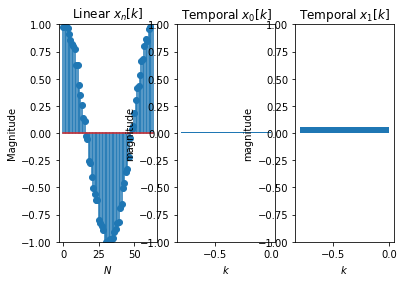

	( ) STATIONARY 	 ( ) ERGODIC
Linear mean changes with k


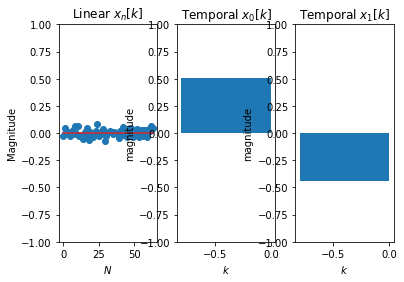

	(x) STATIONARY 	 ( ) ERGODIC
Linear mean constant with k, temporal mean not constant with n


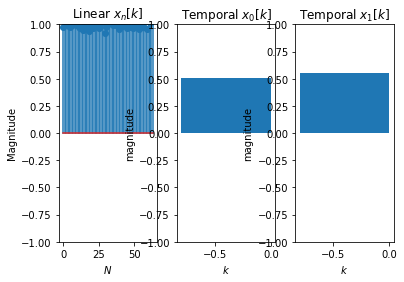

	(x) STATIONARY 	 (x) ERGODIC
Linear mean constant with k, temporal mean constant with n


In [178]:
# Evaluating ERGODIC and STATIONARY random processes
print("However, for STATIONARY random processes:")
print("\tthe estimated linear mean can be assumed to be approximately zero. \n\tIts ACF depends approximately only on the difference k1 - k2")
print("ERGODIC process\n\t is a stationary random process whose higher-order temporal averages of all sample functions are equal to the ensemble averages")
print("\n\nLets use Temporal averaging to Characterize the signals")
def plot_signals(xin):
    x_tavg = np.sum(xin,axis=1)/(2*k+1)
    x_avg  = np.sum(xin,axis=0)/N
    # Show linear average
    plt.subplot(131)
    plt.stem(x_avg)
    plt.ylim([-1,1])
    plt.title(r'Linear $x_n[k]$')
    plt.ylabel("Magnitude")
    plt.xlabel(r'$N$')
    # compare temporal avg for 2 different samples
    nsamp = [0,1] # np.random.randint(1000,size=2)
    for nidx in range(2):
        n = nsamp[nidx]
        plt.subplot(132 + nidx)
        plt.bar(-0.4, x_tavg[n])
        plt.ylim([-1,1])
        plt.title(r'Temporal $x_{%d}[k]$'%(n))
        plt.ylabel("magnitude")
        plt.xlabel(r'$k$')
    plt.show()
    
k = 64    # number of random samples
N = 1000  # number of sample functions

# generate sample functions
np.random.seed(1)
x = np.random.normal(size=(N, k)) # Add gaussian distributed noise
x1 = x + np.tile(np.cos(2*np.pi/k*np.arange(k)), [N, 1])
x2 = x + np.tile([np.ones(L), -np.ones(L)], [N//2, 1])
x3 = x + np.ones([N, L])

# cosine signal, with Gaussian distribution
plot_signals(x1)
# 1/2 samples = +1, 1/2 sample = -1, with Gaussian Distribution.  
print("\t( ) STATIONARY \t ( ) ERGODIC\nLinear mean changes with k")
plot_signals(x2)
print("\t(x) STATIONARY \t ( ) ERGODIC\nLinear mean constant with k, temporal mean not constant with n")
# All 1s, with Gaussian Distribution.
plot_signals(x3)
print("\t(x) STATIONARY \t (x) ERGODIC\nLinear mean constant with k, temporal mean constant with n")



Mean of signal x[k]: 1.954480
Mean of signal y[k]: 1.000330
The CCF is approximately constant so the 2 signals are not correlated


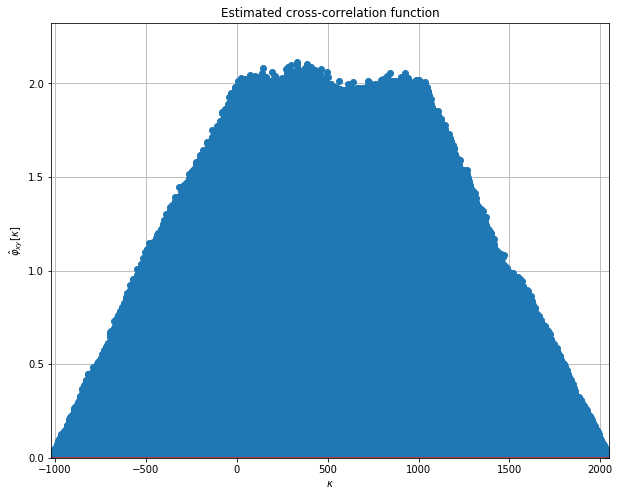

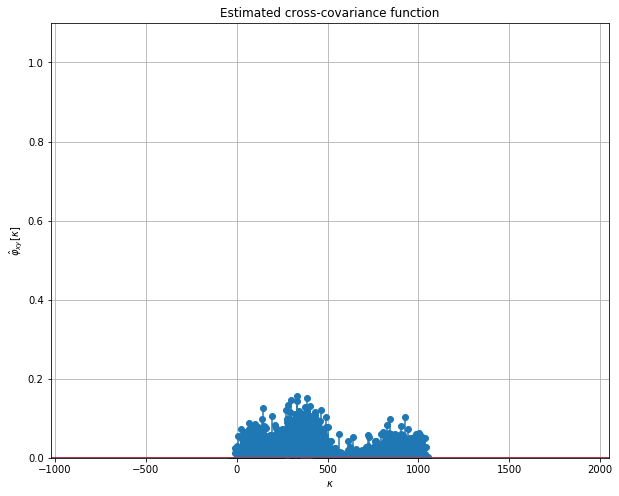

In [181]:
# Cross-Correlation
N = 1024  # length of random signals

# generate two uncorrelated random signals
np.random.seed(2)
x = 2 + np.random.normal(size=N)
y = 1 + np.random.normal(size=2*N)

# compute CCF (for tau-> -k to k :   ccf = x[k]*[y[k+tau]]/N)
ccf = 1/len(x) * np.correlate(x, y, mode='full')
kappa = np.arange(-(N-1), 2*N)

# print mean values of signals
print('Mean of signal x[k]: %f' %np.mean(x))
print('Mean of signal y[k]: %f' %np.mean(y))

# plot CCF 
plt.figure(figsize = (10, 8))
plt.stem(kappa, ccf)
plt.title('Estimated cross-correlation function')
plt.ylabel(r'$\hat{\varphi}_{xy}[\kappa]$')
plt.xlabel(r'$\kappa$')
plt.axis([kappa[0], kappa[-1], 0, 1.1*max(ccf)]);
plt.grid()
print("The CCF is approximately constant so the 2 signals are not correlated")

# Plot the cross-covariance (ccF-ux*uy)
ccc = ccf - np.mean(x)*np.mean(y)
plt.figure(figsize = (10, 8))
plt.stem(kappa, ccc)
plt.title('Estimated cross-covariance function')
plt.ylabel(r'$\hat{\varphi}_{xy}[\kappa]$')
plt.xlabel(r'$\kappa$')
plt.axis([kappa[0], kappa[-1], 0, 1.1]);
plt.grid()